In [ ]:
!pip uninstall -y pmdarima numpy


!pip install numpy==1.23.5  # You can try 1.24.3 or earlier if needed
!pip install pmdarima --no-binary :all:  # Forces fresh compile


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.3/630.3 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user
^C


## Restart the session

In [1]:
# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import pandas as pd

!pip install statsmodels



!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd

import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df

,YEAR,MO,DY,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,2023,12,27,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,2023,12,28,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,2023,12,29,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [2]:
df.columns

Index(['YEAR', 'MO', 'DY', 'PREC', 'SURF_PRESSSURE', 'MAX_TEMP', 'MIN_TEMP',
       'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin',
       'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon'],
      dtype='object')

In [3]:
df.columns
#rename "Month " by  "Month"
df = df.rename(columns={'MO': 'Month'})
df
df = df.rename(columns={'DY': 'Day'})
df


,YEAR,Month,Day,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,2023,12,27,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,2023,12,28,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,2023,12,29,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [4]:
# Create a date time index as Year-Month-day
df['Date'] = pd.to_datetime(df[['YEAR', 'Month', 'Day']])
df

# Make Date as Date time Index
df = df.set_index('Date')
df
import pandas as pd

# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

df['Date'] = pd.to_datetime(df[['YEAR', 'Month', 'Day']])
df
df
# Create an interactive plot with plotly
fig = go.Figure()

# Add the line plot for 'Inflation' with date on x-axis and 'WS10M' on y-axis
fig.add_trace(go.Scatter(x=df['Date'], y=df['WS10M'], mode='lines', name='Wind Speed', line=dict(color='blue')))

# Update layout
fig.update_layout(
    title='WS10M Time Series (2013-2023)',
    xaxis_title='Date',
    yaxis_title='WS10M (Index)',
    template='plotly_dark',  # Choose a template style for the plot
    xaxis=dict(tickangle=45),
    showlegend=True
)

# Show the interactive plot
fig.show()

Missing values in each column:
YEAR                                    0
Month                                   0
Day                                     0
PREC                                    0
SURF_PRESSSURE                          0
MAX_TEMP                                0
MIN_TEMP                                0
RH                                      0
AVG_TEMP                                0
SL_PRESSURE                             0
CLOUD_COVER                             0
WS10M                                   0
WD_sin                                  0
WD_cos                                  0
MONOSOON_SEASON_Northeast_Monsoon       0
MONOSOON_SEASON_Second_Inter_Monsoon    0
MONOSOON_SEASON_Southwest_Monsoon       0
dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
df

,YEAR,Month,Day,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon,Date
Date,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False,2013-01-01
2013-01-02,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False,2013-01-02
2013-01-03,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False,2013-01-03
2013-01-04,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False,2013-01-04
2013-01-05,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2023,12,27,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False,2023-12-27
2023-12-28,2023,12,28,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False,2023-12-28
2023-12-29,2023,12,29,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False,2023-12-29


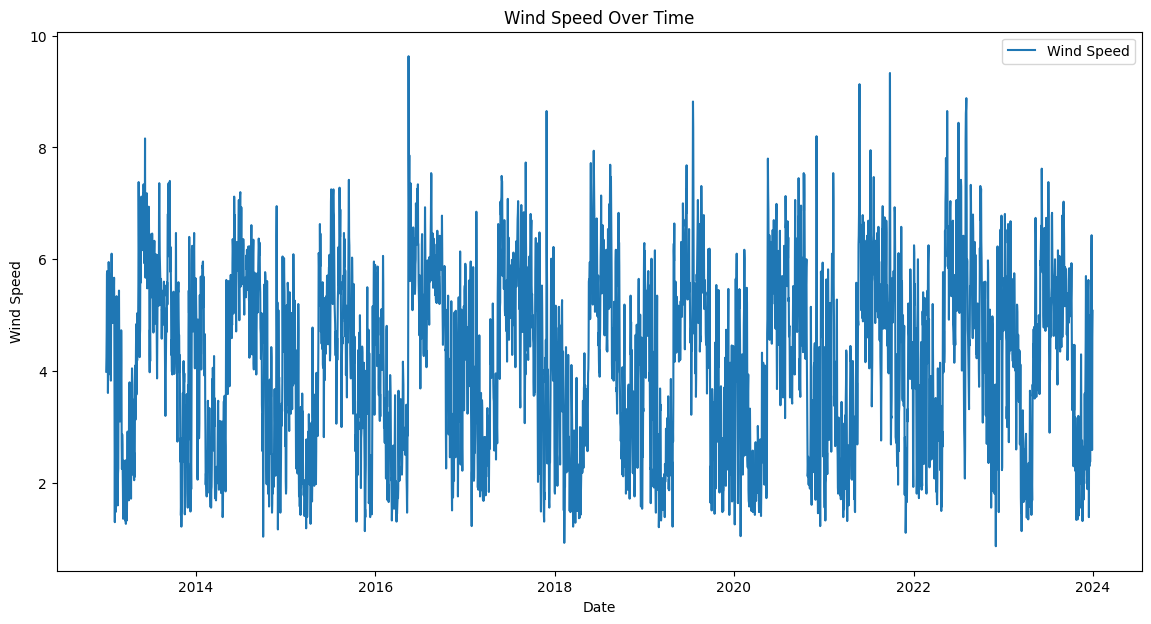

In [7]:
# Plotting the original Wind Speed
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["WS10M"], label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

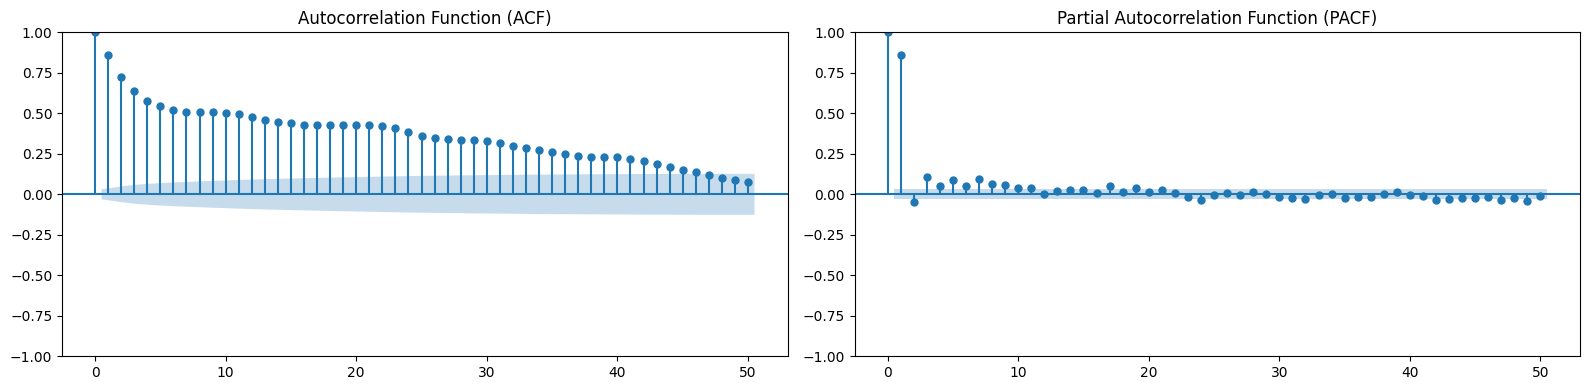

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['WS10M'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['WS10M'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [9]:
## 48 = ACF Plot MA
## 2= PACF plot AR

In [10]:
data=df. copy()

In [11]:
# Split data into train and test

# Set random seed
np.random.seed(42)


train_size = int(len(df) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]


In [13]:

# Fit ARIMA model
model = ARIMA(train["WS10M"], order=(2,0,48))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



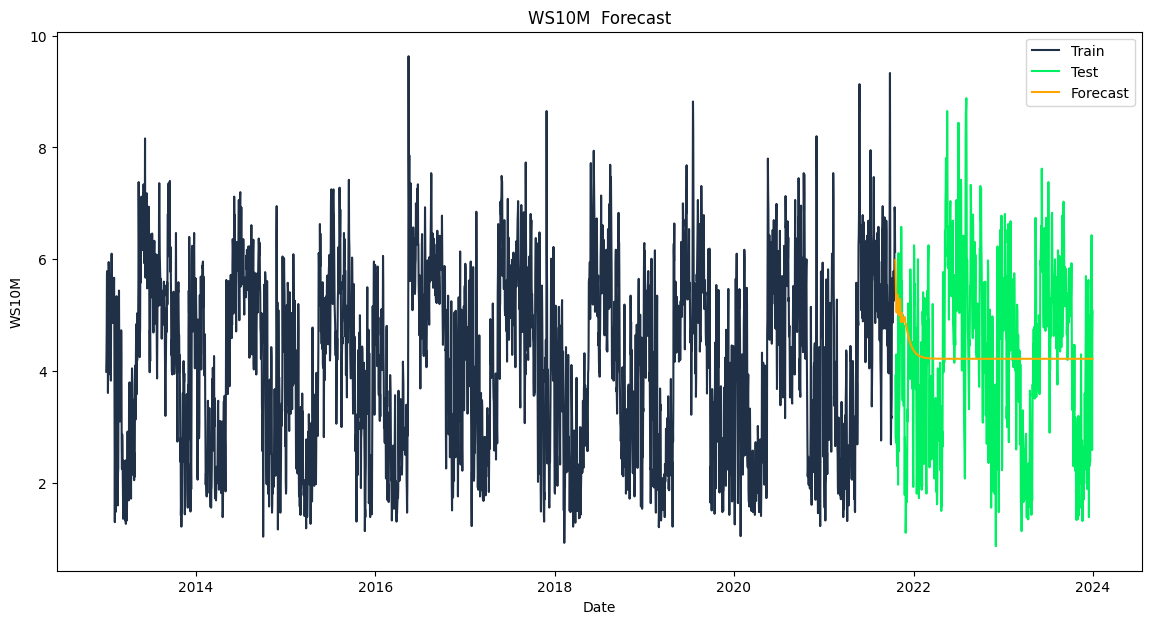

In [14]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('WS10M  Forecast')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()


In [15]:

print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 7550.0407657156475
BIC: 7865.938704389672


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate MSE
mse = mean_squared_error(test["WS10M"], forecast)
print(f"MSE: {mse:.4f}")

# Calculate MAE
mae = mean_absolute_error(test["WS10M"], forecast)
print(f"MAE: {mae:.4f}")

# Calculate MAPE
mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
print(f"MAPE: {mape:.4f}%")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

# Calculate R²
r2 = r2_score(test["WS10M"], forecast)
print(f"R²: {r2:.4f}")


MSE: 2.5272
MAE: 1.3295
MAPE: 40.7321%
RMSE: 1.5897
R²: -0.0492


## Combination of Values

In [17]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Set random seed
np.random.seed(42)
# Define the range for p and q
p_values = range(0, 11)  # p from 0 to 6
q_values = range(0, 11)  # q from 0 to 6

# Initialize a list to store results
results = []

# Iterate over all combinations of p and q
for p, q in itertools.product(p_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(train["WS10M"], order=(p, 0, q))  # d=0 for no differencing
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=len(test))

        # Calculate metrics
        mse = mean_squared_error(test["WS10M"], forecast)
        mae = mean_absolute_error(test["WS10M"], forecast)
        mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
        rmse = np.sqrt(mse)

        # Store results
        results.append({
            'p': p,
            'q': q,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic,
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse
        })
    except:
        # Skip combinations that cause errors (e.g., non-stationary data)
        continue

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC (lower is better)
results_df = results_df.sort_values(by='AIC')

# Display the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

    p   q           AIC           BIC       MSE       MAE       MAPE      RMSE
81  7   4   7502.272589   7581.247074  2.482731  1.324484  39.778791  1.575669
42  3   9   7504.662195   7589.711640  2.484514  1.319866  40.179876  1.576234
54  4  10   7505.892053   7603.091418  2.469785  1.318096  40.065118  1.571555
43  3  10   7507.198191   7598.322597  2.474684  1.310776  40.786811  1.573113
30  2   8   7513.990557   7586.890082  2.534912  1.326994  41.392715  1.592141
.. ..  ..           ...           ...       ...       ...        ...       ...
4   0   4   8048.305551   8084.755313  2.429120  1.307985  39.420371  1.558564
3   0   3   8233.761316   8264.136118  2.428077  1.307674  39.411790  1.558229
2   0   2   8688.923632   8713.223474  2.426274  1.307016  39.390464  1.557650
1   0   1   9580.110871   9598.335752  2.425837  1.306904  39.385771  1.557510
0   0   0  12089.836023  12101.985943  2.424285  1.305824  39.355709  1.557011

[121 rows x 8 columns]


In [18]:
results_df

,p,q,AIC,BIC,MSE,MAE,MAPE,RMSE
81,7,4,7502.272589,7581.247074,2.482731,1.324484,39.778791,1.575669
42,3,9,7504.662195,7589.711640,2.484514,1.319866,40.179876,1.576234
54,4,10,7505.892053,7603.091418,2.469785,1.318096,40.065118,1.571555
43,3,10,7507.198191,7598.322597,2.474684,1.310776,40.786811,1.573113
30,2,8,7513.990557,7586.890082,2.534912,1.326994,41.392715,1.592141
...,...,...,...,...,...,...,...,...
4,0,4,8048.305551,8084.755313,2.429120,1.307985,39.420371,1.558564
3,0,3,8233.761316,8264.136118,2.428077,1.307674,39.411790,1.558229
2,0,2,8688.923632,8713.223474,2.426274,1.307016,39.390464,1.557650
1,0,1,9580.110871,9598.335752,2.425837,1.306904,39.385771,1.557510


In [19]:
# Sort the results by AIC (ascending order)
results_df_sorted = results_df.sort_values(by='AIC')

# Select the best combination
best_model_1 = results_df_sorted.iloc[0]
print("Best Model 1 :")
print(best_model_1)



# Select the best combination
best_model_2 = results_df_sorted.iloc[1]
print("Best Model 2 :")
print(best_model_2)

Best Model 1 :
p          7.000000
q          4.000000
AIC     7502.272589
BIC     7581.247074
MSE        2.482731
MAE        1.324484
MAPE      39.778791
RMSE       1.575669
Name: 81, dtype: float64
Best Model 2 :
p          3.000000
q          9.000000
AIC     7504.662195
BIC     7589.711640
MSE        2.484514
MAE        1.319866
MAPE      40.179876
RMSE       1.576234
Name: 42, dtype: float64


## Combination of values with intigrated components

In [20]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Set random seed for reproducibility
np.random.seed(42)

# Define the range for p, d, and q
p_values = range(0, 11)  # p from 0 to 6
d_values = range(0, 3)  # d from 0 to 2
q_values = range(0, 11)  # q from 0 to 6

# Initialize a list to store results
results = []

# Iterate over all combinations of p, d, and q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(train["WS10M"], order=(p, d, q))
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=len(test))

        # Calculate metrics
        mse = mean_squared_error(test["WS10M"], forecast)
        mae = mean_absolute_error(test["WS10M"], forecast)
        mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
        rmse = np.sqrt(mse)

        # Store results
        results.append({
            'p': p,
            'd': d,
            'q': q,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic,
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse
        })
    except:
        # Skip combinations that cause errors (e.g., non-stationary data)
        continue

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC (lower is better)
results_df = results_df.sort_values(by='AIC')

# Display the results
print(results_df)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarni

     p  d   q           AIC           BIC            MSE         MAE  \
235  7  0   4   7502.272589   7581.247074       2.482731    1.324484   
108  3  0   9   7504.662195   7589.711640       2.484514    1.319866   
142  4  0  10   7505.892053   7603.091418       2.469785    1.318096   
109  3  0  10   7507.198191   7598.322597       2.474684    1.310776   
74   2  0   8   7513.990557   7586.890082       2.534912    1.326994   
..  .. ..  ..           ...           ...            ...         ...   
88   2  2   0   9081.322632   9099.545645    7524.224842   74.680021   
55   1  2   0   9524.536786   9536.685462   58389.599544  208.877500   
1    0  0   1   9580.110871   9598.335752       2.425837    1.306904   
22   0  2   0  10179.441269  10185.515607  107796.432451  283.982002   
0    0  0   0  12089.836023  12101.985943       2.424285    1.305824   

            MAPE        RMSE  
235    39.778791    1.575669  
108    40.179876    1.576234  
142    40.065118    1.571555  
109    40.7

In [21]:
results_df

,p,d,q,AIC,BIC,MSE,MAE,MAPE,RMSE
235,7,0,4,7502.272589,7581.247074,2.482731,1.324484,39.778791,1.575669
108,3,0,9,7504.662195,7589.711640,2.484514,1.319866,40.179876,1.576234
142,4,0,10,7505.892053,7603.091418,2.469785,1.318096,40.065118,1.571555
109,3,0,10,7507.198191,7598.322597,2.474684,1.310776,40.786811,1.573113
74,2,0,8,7513.990557,7586.890082,2.534912,1.326994,41.392715,1.592141
...,...,...,...,...,...,...,...,...,...
88,2,2,0,9081.322632,9099.545645,7524.224842,74.680021,2042.753130,86.742290
55,1,2,0,9524.536786,9536.685462,58389.599544,208.877500,5745.040386,241.639400
1,0,0,1,9580.110871,9598.335752,2.425837,1.306904,39.385771,1.557510
22,0,2,0,10179.441269,10185.515607,107796.432451,283.982002,7817.267683,328.323670


In [22]:
# Sort the results by AIC (ascending order)
results_df_sorted = results_df.sort_values(by='AIC')

# Select the best combination
best_model_1 = results_df_sorted.iloc[0]
print("Best Model 1 :")
print(best_model_1)



# Select the best combination
best_model_2 = results_df_sorted.iloc[1]
print("Best Model 2 :")
print(best_model_2)

Best Model 1 :
p          7.000000
d          0.000000
q          4.000000
AIC     7502.272589
BIC     7581.247074
MSE        2.482731
MAE        1.324484
MAPE      39.778791
RMSE       1.575669
Name: 235, dtype: float64
Best Model 2 :
p          3.000000
d          0.000000
q          9.000000
AIC     7504.662195
BIC     7589.711640
MSE        2.484514
MAE        1.319866
MAPE      40.179876
RMSE       1.576234
Name: 108, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred freq

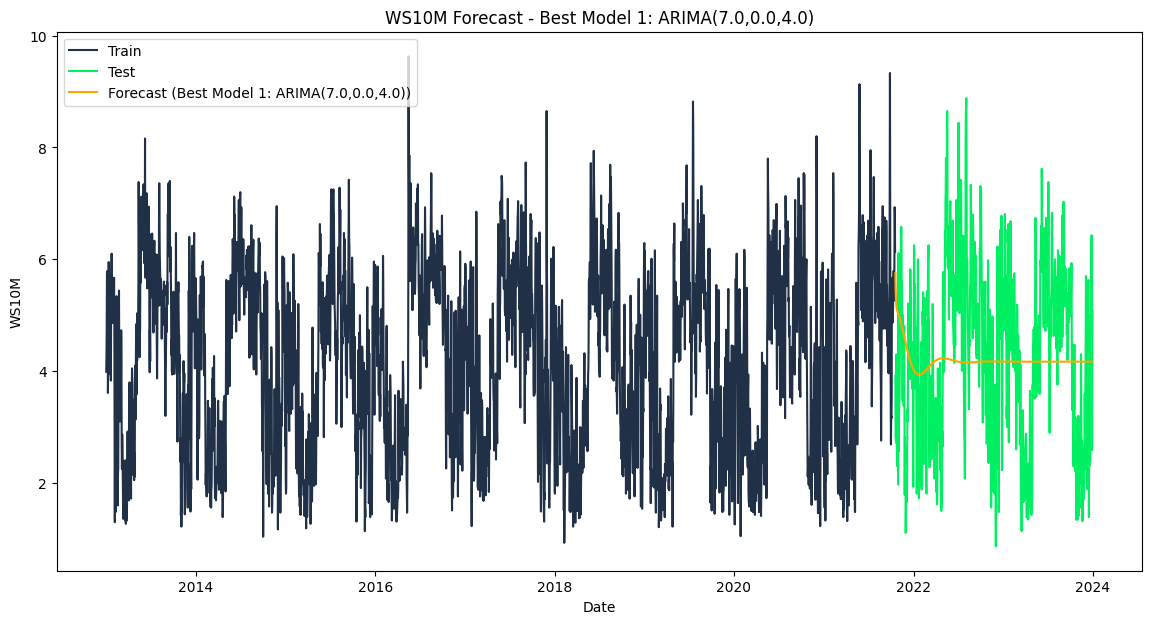

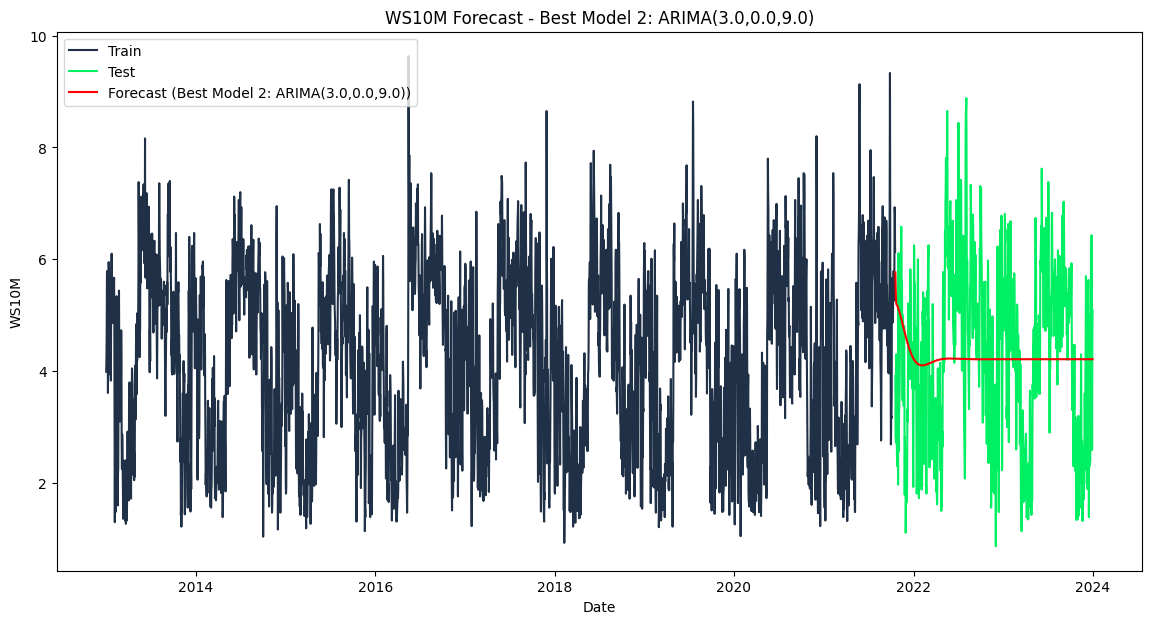

In [23]:
# Fit the best two models
best_p1, best_d1, best_q1 = best_model_1["p"], best_model_1["d"], best_model_1["q"]
best_p2, best_d2, best_q2 = best_model_2["p"], best_model_2["d"], best_model_2["q"]

# Fit ARIMA models
model_1 = ARIMA(train["WS10M"], order=(best_p1, best_d1, best_q1)).fit()
model_2 = ARIMA(train["WS10M"], order=(best_p2, best_d2, best_q2)).fit()

# Forecast
forecast_1 = model_1.forecast(steps=len(test))
forecast_2 = model_2.forecast(steps=len(test))

# Plot the results for Best Model 1
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast_1, label=f'Forecast (Best Model 1: ARIMA({best_p1},{best_d1},{best_q1}))', color='orange')
plt.title(f'WS10M Forecast - Best Model 1: ARIMA({best_p1},{best_d1},{best_q1})')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Plot the results for Best Model 2
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast_2, label=f'Forecast (Best Model 2: ARIMA({best_p2},{best_d2},{best_q2}))', color='red')
plt.title(f'WS10M Forecast - Best Model 2: ARIMA({best_p2},{best_d2},{best_q2})')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()


## Auto ARIMA

In [12]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.3 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7543.683, Time=9.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18769.542, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7859.130, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15015.572, Time=1.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7722.173, Time=2.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7847.118, Time=3.40 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=17.32 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7547.125, Time=7.83 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7859.888, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7627.212, Time=1.41 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7543.764, Time=2.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=6.48 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7518.764, Time=5.94 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7613.504, Time=1.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AI

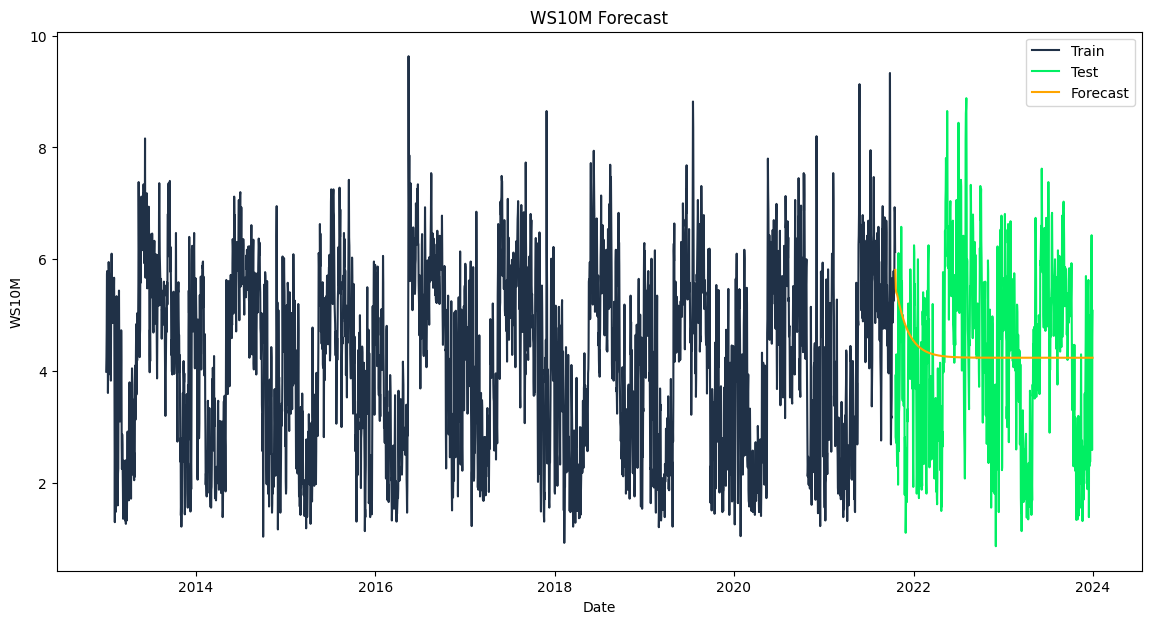

AIC: 7514.9718
BIC: 7563.5715
MSE: 2.5421
MAE: 1.3326
MAPE: 41.1479%
RMSE: 1.5944


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
# -------------------------------
# Set random seed for reproducibility
np.random.seed(42)
# ------------------------
# Assuming 'df' is your DataFrame and 'WS10M' is the target column
# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use AutoARIMA to find the best ARIMA model
auto_model = auto_arima(
    train["WS10M"],  # Training data
    seasonal=False,   # Disable seasonal component (set to True if you have seasonality)
    trace=True,       # Print logs to see the search process
    error_action="ignore",  # Ignore invalid parameter combinations
    suppress_warnings=True, # Suppress warnings
    stepwise=True,    # Use stepwise algorithm for faster search
    information_criterion='aic'  # Use AIC to select the best model
)

# Print the best model summary
print(auto_model.summary())

# Forecast using the best model
forecast = auto_model.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('WS10M Forecast')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Calculate metrics
mse = mean_squared_error(test["WS10M"], forecast)
mae = mean_absolute_error(test["WS10M"], forecast)
mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
rmse = np.sqrt(mse)

# Print metrics
print(f"AIC: {auto_model.aic():.4f}")
print(f"BIC: {auto_model.bic():.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")

## Opimal ARIMA
## p=7 q= 4 d=0
## Residual DIagnosis

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  WS10M   No. Observations:                 3213
Model:                 ARIMA(7, 0, 4)   Log Likelihood               -3738.138
Date:                Sat, 05 Jul 2025   AIC                           7502.276
Time:                        02:00:35   BIC                           7581.250
Sample:                    01-01-2013   HQIC                          7530.584
                         - 10-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1694      0.160     26.090      0.000       3.856       4.483
ar.L1          1.3469      2.258      0.597      0.551      -3.078       5.772
ar.L2          0.7997      4.340      0.184      0.8

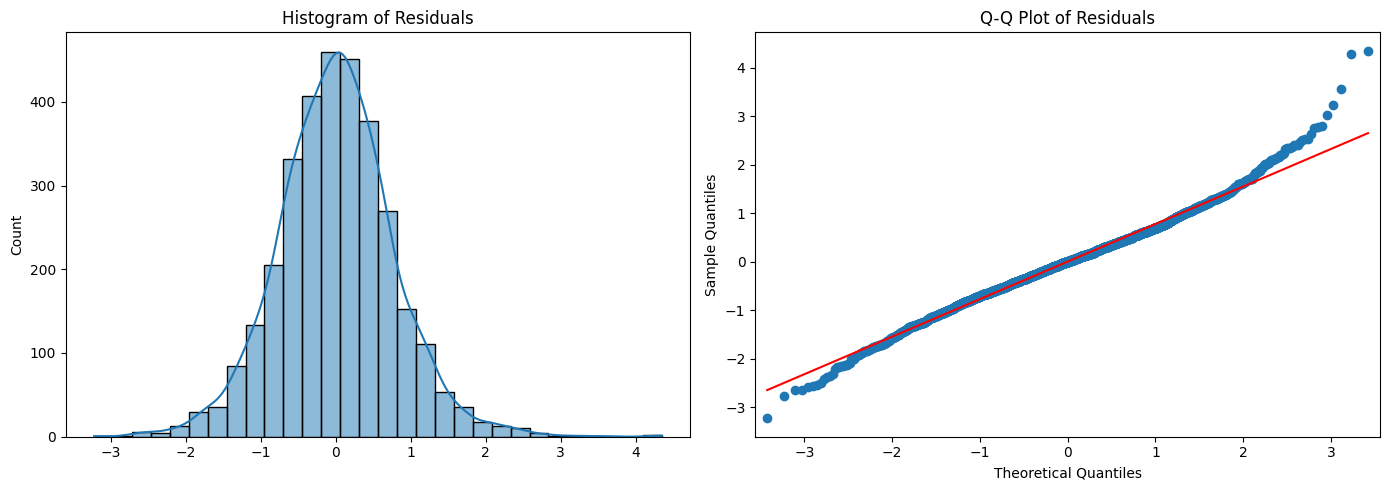

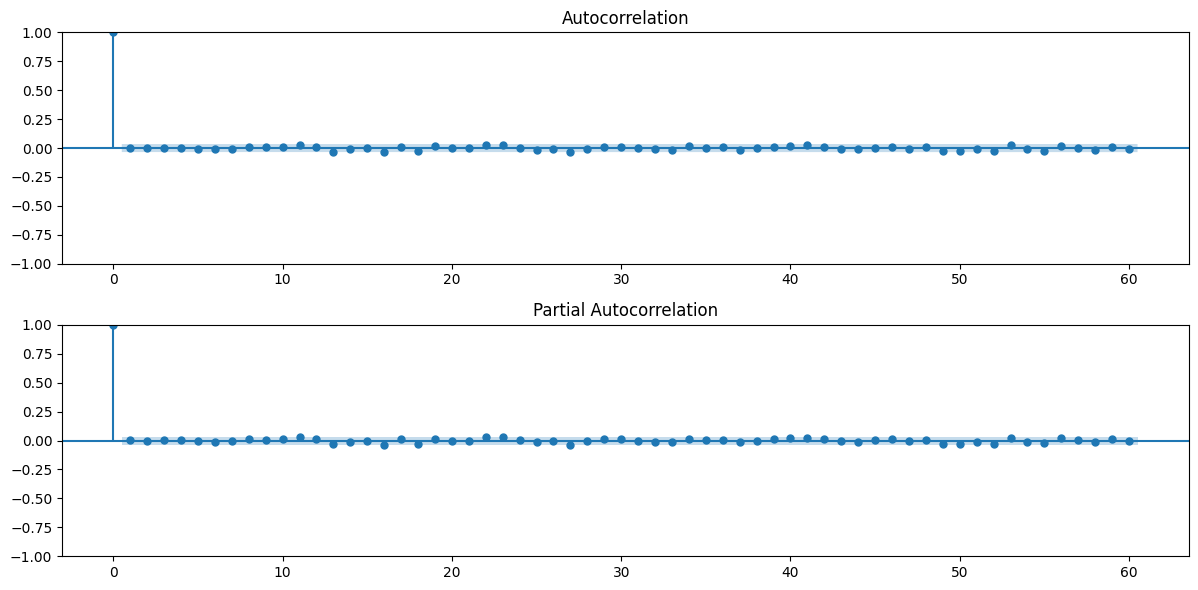


Residual Diagnostic Tests:
Ljung-Box Q(1): 0.00, p-value = 0.97
Jarque-Bera: 274.14, p-value = 0.00
Heteroscedasticity (ARCH) Test: F = 56.32, p-value = 0.00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import jarque_bera
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Step 1: Prepare the Data ---
# Assuming df["WS10M"] is your series and is already cleaned
y = df["WS10M"].dropna()

# --- Step 2: Train-Test Split ---
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# --- Step 3: Fit ARIMA(7,0,4) Model ---
model = ARIMA(train, order=(7, 0, 4))
model_fit = model.fit()

# --- Step 4: Print Model Summary ---
print(model_fit.summary())

# --- Step 5: Forecast ---
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# --- Step 6: Evaluation Metrics ---
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nEvaluation Metrics:")
print(f"AIC: {model_fit.aic:.3f}")
print(f"BIC: {model_fit.bic:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.3f}")

# --- Step 7: Residuals ---
residuals = model_fit.resid

# --- Step 8: Residual Plots ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")

plt.subplot(1, 2, 2)
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# --- Step 9: ACF & PACF of Residuals ---
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(residuals, ax=ax[0], lags=60)
plot_pacf(residuals, ax=ax[1], lags=60)
plt.tight_layout()
plt.show()

# --- Step 10: Statistical Tests on Residuals ---
print("\nResidual Diagnostic Tests:")

# Ljung-Box test
ljung = acorr_ljungbox(residuals, lags=[1], return_df=True)
print(f"Ljung-Box Q(1): {ljung['lb_stat'].values[0]:.2f}, p-value = {ljung['lb_pvalue'].values[0]:.2f}")

# Jarque-Bera test
jb_stat, jb_pval, _, _ = jarque_bera(residuals)
print(f"Jarque-Bera: {jb_stat:.2f}, p-value = {jb_pval:.2f}")

# Heteroscedasticity test (ARCH)
arch_test = het_arch(residuals)
print(f"Heteroscedasticity (ARCH) Test: F = {arch_test[0]:.2f}, p-value = {arch_test[1]:.2f}")


## Research Paper

https://www.researchgate.net/publication/305453887_Short-term_wind_speed_forecasting_using_ARIMA_model




In [14]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the range for p and q
p_values = range(0, 11)  # p from 0 to 10
q_values = range(0, 11)  # q from 0 to 10

# Initialize a matrix to store RMSE values
rmse_matrix = np.zeros((len(q_values), len(p_values)))  # Rows: q, Columns: p

# Iterate over all combinations of p and q
for p, q in itertools.product(p_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(train["WS10M"], order=(p, 0, q))  # d=0 for no differencing
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=len(test))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test["WS10M"], forecast))

        # Store RMSE in the matrix
        rmse_matrix[q, p] = rmse  # Rows: q, Columns: p
    except:
        # Skip combinations that cause errors (e.g., non-stationary data)
        rmse_matrix[q, p] = np.nan  # Mark invalid combinations as NaN
        continue

# Convert the RMSE matrix to a DataFrame for better visualization
rmse_df = pd.DataFrame(rmse_matrix, index=q_values, columns=p_values)

# Add row and column labels
rmse_df.index.name = 'MA (q)'
rmse_df.columns.name = 'AR (p)'

# Display the RMSE table
print("RMSE Table:")
print(rmse_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

RMSE Table:
AR (p)        0         1         2         3         4         5         6   \
MA (q)                                                                         
0       1.557011  1.568809  1.567662  1.570604  1.571630  1.573511  1.574661   
1       1.557510  1.567399  1.568196  1.595121  1.595164  1.594849  1.594790   
2       1.557650  1.572628  1.595501  1.799031  1.592005  1.592567  1.595309   
3       1.558229  1.582027  1.595415  1.593336  1.594667  1.570423  1.595446   
4       1.558564  1.592641  1.595268  1.597764  1.595648  1.573181  1.602961   
5       1.559833  1.594334  1.595241  1.591367  1.592980  1.596616  1.595847   
6       1.560963  1.595438  1.595452  1.596652  1.592351  1.597066  1.592823   
7       1.561502  1.595446  1.595442  1.595216  1.593832  1.597799  1.588128   
8       1.561735  1.595354  1.592157  1.596058  1.601163  1.604883  1.611217   
9       1.562706  1.595227  1.605084  1.576262  1.594295  1.595689  1.607524   
10      1.563484  1.595050  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



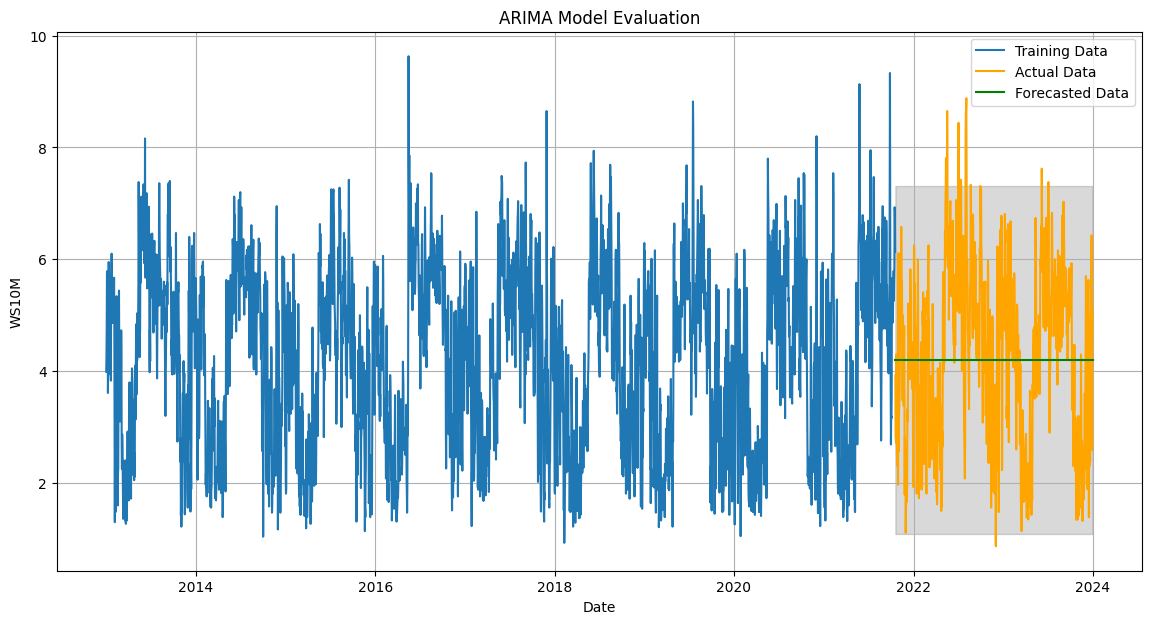

Evaluation Metrics:
 - RMSE : 1.5570
 - MSE  : 2.4243
 - MAE  : 1.3058
 - MAPE : 39.36%
 - R²   : -0.0065


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['WS10M'], order=(0, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Evaluation Metrics
mse = mean_squared_error(test['WS10M'], test_forecast_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['WS10M'], test_forecast_series)

# Avoid division by zero for MAPE
mape = np.mean(np.abs((test['WS10M'] - test_forecast_series) / test['WS10M'])) * 100
r2 = r2_score(test['WS10M'], test_forecast_series)

# Plot actual vs forecast
plt.figure(figsize=(14, 7))
plt.plot(train['WS10M'], label='Training Data')
plt.plot(test['WS10M'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=0.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Evaluation Metrics:")
print(f" - RMSE : {rmse:.4f}")
print(f" - MSE  : {mse:.4f}")
print(f" - MAE  : {mae:.4f}")
print(f" - MAPE : {mape:.2f}%")
print(f" - R²   : {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



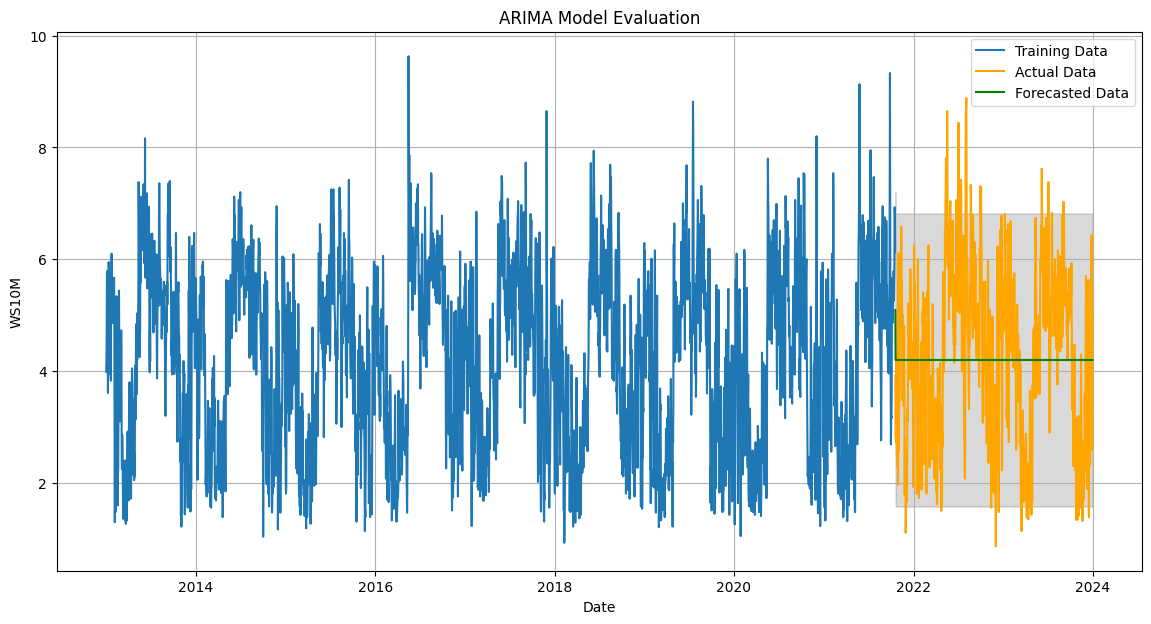

Evaluation Metrics:
 - RMSE : 1.5575
 - MSE  : 2.4258
 - MAE  : 1.3069
 - MAPE : 39.39%
 - R²   : -0.0071


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['WS10M'], order=(0, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Evaluation Metrics
mse = mean_squared_error(test['WS10M'], test_forecast_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['WS10M'], test_forecast_series)

# Avoid division by zero for MAPE
mape = np.mean(np.abs((test['WS10M'] - test_forecast_series) / test['WS10M'])) * 100
r2 = r2_score(test['WS10M'], test_forecast_series)

# Plot actual vs forecast
plt.figure(figsize=(14, 7))
plt.plot(train['WS10M'], label='Training Data')
plt.plot(test['WS10M'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=0.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Evaluation Metrics:")
print(f" - RMSE : {rmse:.4f}")
print(f" - MSE  : {mse:.4f}")
print(f" - MAE  : {mae:.4f}")
print(f" - MAPE : {mape:.2f}%")
print(f" - R²   : {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



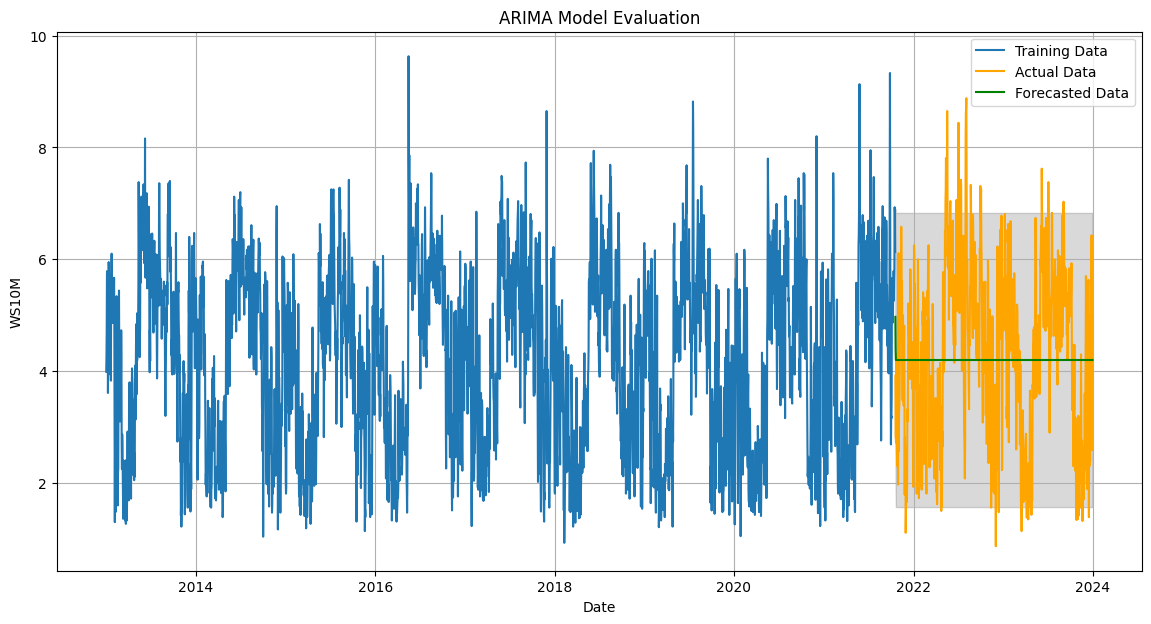

Evaluation Metrics:
 - RMSE : 1.5577
 - MSE  : 2.4263
 - MAE  : 1.3070
 - MAPE : 39.39%
 - R²   : -0.0073


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['WS10M'], order=(0, 0, 2))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Evaluation Metrics
mse = mean_squared_error(test['WS10M'], test_forecast_series)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['WS10M'], test_forecast_series)

# Avoid division by zero for MAPE
mape = np.mean(np.abs((test['WS10M'] - test_forecast_series) / test['WS10M'])) * 100
r2 = r2_score(test['WS10M'], test_forecast_series)

# Plot actual vs forecast
plt.figure(figsize=(14, 7))
plt.plot(train['WS10M'], label='Training Data')
plt.plot(test['WS10M'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=0.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Evaluation Metrics:")
print(f" - RMSE : {rmse:.4f}")
print(f" - MSE  : {mse:.4f}")
print(f" - MAE  : {mae:.4f}")
print(f" - MAPE : {mape:.2f}%")
print(f" - R²   : {r2:.4f}")
